<a href="https://colab.research.google.com/github/Shivaprabhath/Codealpha/blob/main/code_alpha_music_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.stem.porter import PorterStemmer

import csv

In [ ]:
df = pd.read_csv('/content/spotify_millsongdata.csv')

In [ ]:
df

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


No charts were generated by quickchart


In [ ]:
df.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


<Axes: >

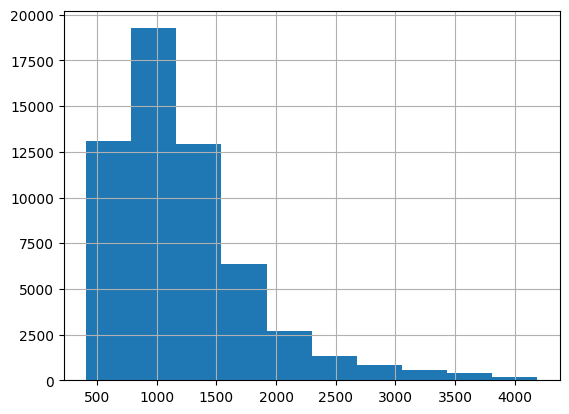

In [ ]:

df['text'].str.len().hist()

In [ ]:
df.tail()

,artist,song,link,text
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


In [ ]:
df.shape

(57650, 4)

In [ ]:
df.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


In [ ]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [ ]:
df =df.sample(5000).drop('link', axis=1).reset_index(drop=True)

In [ ]:
df.head(10)

,artist,song,text
0,Adam Sandler,The Lonesome Kicker,"Me, I'm the Lonesome Kicker \r\nExtra points,..."
1,Neil Young,Cryin' Eyes,Who's gonna dry your cryin' eyes? \r\nWho's g...
2,Hank Williams Jr.,Heaven Can't Be Found,I looked over at my pillow but your face wasn'...
3,Kirsty Maccoll,Darling Let's Have Another Baby,"Darling, let's have another baby \r\nLet's ma..."
4,Carpenters,You're Enough,You're enough \r\nIf I never had another \r\...
5,George Strait,Give It Away,She was stormin' through the house that day \...
6,Rush,Limelight,Living on a lighted stage \r\nApproaches the ...
7,Iggy Pop,Platonic,Strategic angles indirectly revealed \r\nUnit...
8,Rush,Double Agent,Where would you rather be? \r\nAnywhere but h...
9,Erasure,Stand By Your Man,Sometimes it's hard to be a woman \r\nGivin' ...


In [ ]:
df.shape

(5000, 3)

In [ ]:
stemmer = PorterStemmer()
def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenization('you are beautiful,beauty')

'you are beauti , beauti'

In [ ]:
df['text'] = df['text'].apply(lambda x: tokenization(x))

In [ ]:
df['text'] = df['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex = True)

In [ ]:
tfidvector = TfidfVectorizer(analyzer='word',stop_words='english')
matrix = tfidvector.fit_transform(df['text'])
similarity = cosine_similarity(matrix)

In [ ]:
similarity[0]

array([1.        , 0.02528451, 0.03706852, ..., 0.04460125, 0.04046621,
       0.02301928])

In [ ]:
df[df['song']=='Good Old Days'].index[0]

3197

In [ ]:
def recommender(song_name):
  idx = df[df['song'] == song_name].index[0]
  distances = sorted(list(enumerate(similarity[idx])),reverse=True,key=lambda x:x[1])
  songs = []
  for m_id in distances[1:20]:
      songs.append(df.iloc[m_id[0]].song)

  return songs

In [ ]:
recommender('Good Old Days')

["You're No Good",
 'Old Friend',
 'Days Of 49',
 'Good To My Baby',
 'Possibility Days',
 'Scentless Apprentice (Rehearsal)',
 'Life Is Good',
 'It Was A Very Good Year',
 'Old Friends',
 'Good Morning Beautiful',
 'Fool Hearted Memory',
 'Where Do We Fit',
 'Good Times',
 'One Day At A Time',
 'Day After Day',
 'Day After Day',
 'I Feel Good',
 'Big Day',
 'None Of Them Any Good']